# *Preprocesado*

*Daniel Felipe Soto Duque*  
*José Miguel Castañeda Bedoya*   
*Francisco Tolosa*


In [ ]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objs as go

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']="."

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!chmod 600 ./kaggle.json

chmod: cannot access './kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c udea-ai4eng-20242 --force

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in .. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!unzip udea-ai4eng-20242.zip

Archive:  udea-ai4eng-20242.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
data=pd.read_csv('train.csv')

# **Cargamos los datos del archivo `train.csv` y los visualizamos para confirmar que se importaron correctamente. Revisamos la estructura y el contenido de las columnas para asegurarnos de que los datos están listos para su análisis posterior.**

In [ ]:
data

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


# **Estamos revisando la estructura del DataFrame utilizando `data.info()`, lo que nos permite ver el número total de entradas, los tipos de datos de cada columna y la cantidad de valores no nulos. Esta revisión nos ayudará a planificar los análisis y modelados posteriores.**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

Al revisar la salida de `data.info()`, observamos que el DataFrame tiene un total de **692,500 entradas** y **12 columnas**. Aquí hay algunos puntos clave que hemos encontrado:

1. **Columnas con valores no nulos:**
   - La mayoría de las columnas tienen la misma cantidad de entradas (692,500), lo que indica que son completas. Sin embargo, hay varias columnas que presentan datos faltantes:
     - `ESTU_VALORMATRICULAUNIVERSIDAD`: 686,213 valores no nulos.
     - `ESTU_HORASSEMANATRABAJA`: 661,643 valores no nulos.
     - `FAMI_ESTRATOVIVIENDA`: 660,363 valores no nulos.
     - `FAMI_TIENEINTERNET`: 665,871 valores no nulos.
     - `FAMI_EDUCACIONPADRE`: 669,322 valores no nulos.
     - `FAMI_EDUCACIONMADRE`: 668,836 valores no nulos.
     - `ESTU_PAGOMATRICULAPROPIO`: 686,002 valores no nulos.

2. **Tipos de datos:**
   - Dos columnas son de tipo `int64` (ID y PERIODO), mientras que las demás son de tipo `object`, lo que indica que contienen texto o categorías.


### Importancia de esta revisión:
- Identificar columnas con datos faltantes que podrían necesitar tratamiento antes de realizar análisis o modelado.
- Entender qué tipo de datos estamos manejando, lo que influye en cómo podemos analizarlos y procesarlos.
- Planificar los pasos siguientes para limpiar y preparar los datos para su análisis.


Transformación de la columna:
La columna RENDIMIENTO_GLOBAL originalmente contenía categorías de rendimiento académico: 'alto', 'medio-alto', 'medio-bajo' y 'bajo'.
se le asignaran datos numericos para facilitar su manejo :
Alto se convierte en 4
Medio-alto se convierte en 3
Medio-bajo se convierte en 2
Bajo se convierte en 1

In [ ]:
data['RENDIMIENTO_GLOBAL'] = data['RENDIMIENTO_GLOBAL'].map({'alto': 4, 'medio-alto': 3, 'medio-bajo': 2, 'bajo': 1})


# Se creó un conjunto de visualizaciones para explorar la relación entre algunas características categóricas y el rendimiento académico de los estudiantes.

<ipython-input-43-abf0c1a2691d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.RENDIMIENTO_GLOBAL[k[c]==v],label=v);
<ipython-input-43-abf0c1a2691d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.RENDIMIENTO_GLOBAL[k[c]==v],label=v);
<ipython-input-43-abf0c1a2691d>:6: UserWarning: 

`dis

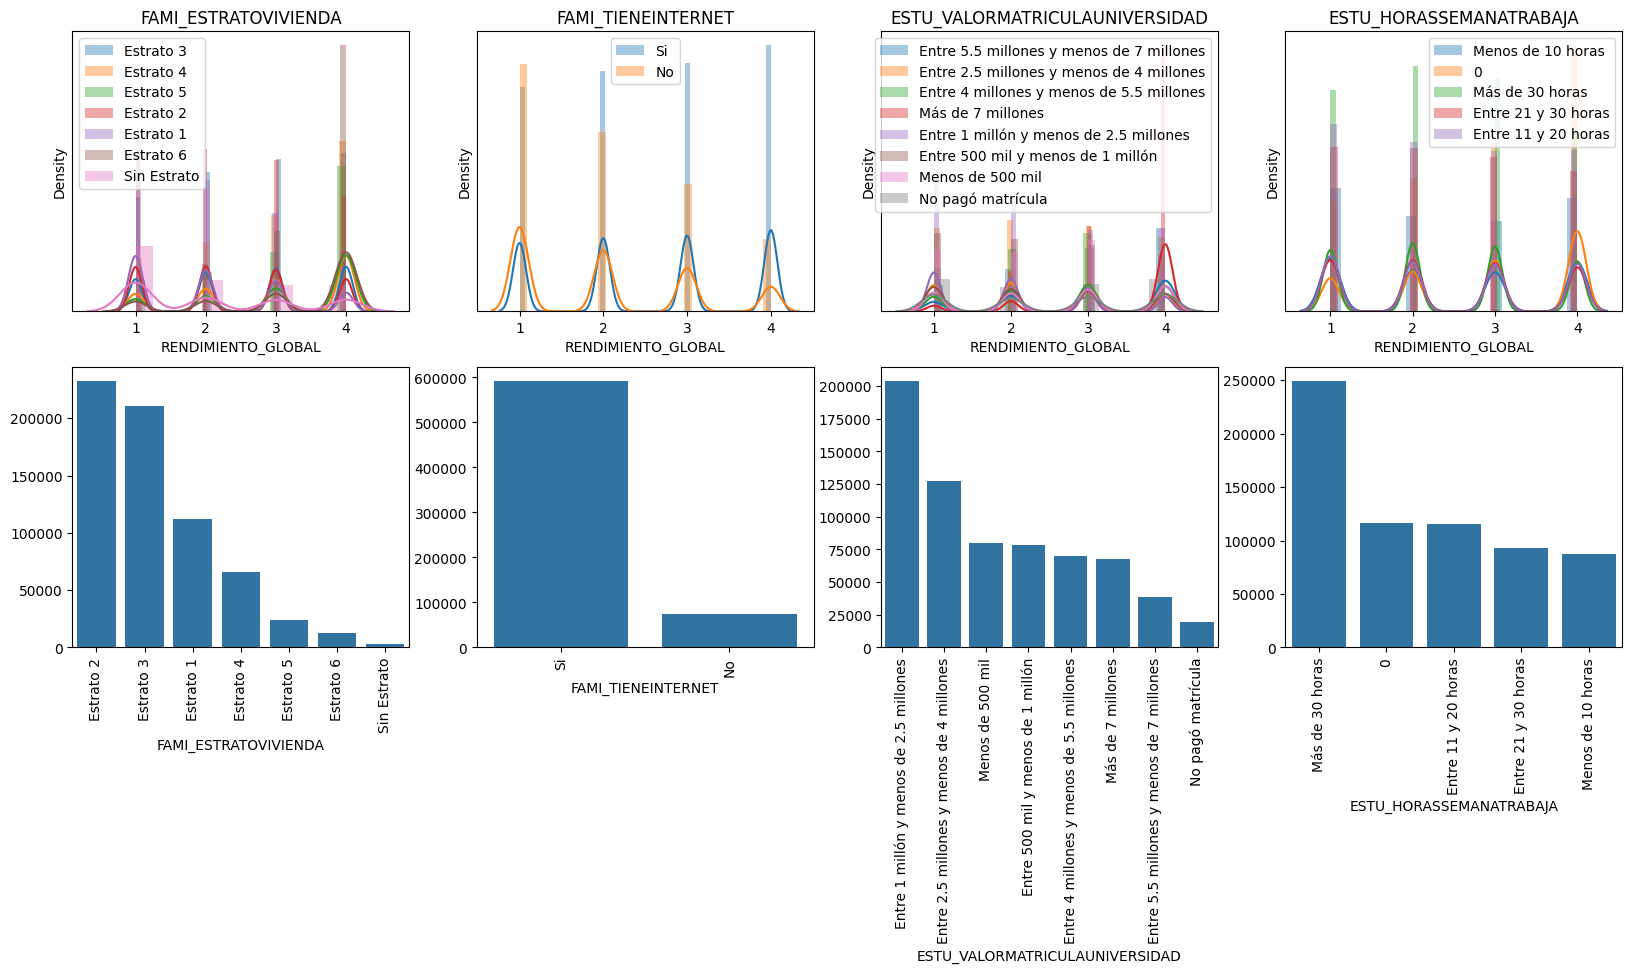

In [ ]:
plt.figure(figsize=(20, 8))
for i,c in enumerate(['FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA']):
  plt.subplot(2,4,i+1)
  k=data[[c,'RENDIMIENTO_GLOBAL']].dropna()
  for v in data[c].dropna().unique():
    sns.distplot(k.RENDIMIENTO_GLOBAL[k[c]==v],label=v);
    plt.title(c)
  plt.yticks([])
  plt.legend()
  plt.subplot(2,4,i+5)
  vc=k[c].value_counts()
  sns.barplot(x=vc.index,y=vc.values)
  plt.xticks(range(len(vc)),vc.index,rotation='vertical')



Se eliminó la columna `ID` del DataFrame, ya que probablemente al ser un metodo de identificacion no era relevante para el análisis o modelado posterior. Esto se hizo utilizando `data.drop(columns=['ID'], inplace=True)`, lo que asegura que la eliminación sea permanente en el DataFrame.

A continuación, se verificaron las columnas restantes y su información con `print(data.info())`. Esto nos permitió confirmar que la columna `ID` fue eliminada correctamente y revisar el estado actual del DataFrame.


In [ ]:
data.drop(columns=['ID',], inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   PERIODO                         692500 non-null  int64 
 1   ESTU_PRGM_ACADEMICO             692500 non-null  object
 2   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 3   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 4   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 5   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 6   FAMI_TIENEINTERNET              665871 non-null  object
 7   FAMI_EDUCACIONPADRE             669322 non-null  object
 8   FAMI_EDUCACIONMADRE             668836 non-null  object
 9   ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 10  RENDIMIENTO_GLOBAL              692500 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 58.1+ MB


In [ ]:
data

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,3
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,4
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,2
...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,3
692496,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,1
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,2
692498,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,1


# Periodo
La variable fue eliminada ya que no se considere relevante el año en el cual fue inscrito

In [ ]:
# Eliminar la Periodo
data.drop(columns=['PERIODO'], inplace=True)

# Verificar las columnas restantes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ESTU_PRGM_ACADEMICO             692500 non-null  object
 1   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 2   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 3   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 4   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 5   FAMI_TIENEINTERNET              665871 non-null  object
 6   FAMI_EDUCACIONPADRE             669322 non-null  object
 7   FAMI_EDUCACIONMADRE             668836 non-null  object
 8   ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 9   RENDIMIENTO_GLOBAL              692500 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 52.8+ MB


In [ ]:
data.head()

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,3
1,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,4
4,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,2


Análisis de la variable ESTU_PRGM_ACADEMICO:
Descripción General:

Esta columna contiene datos categóricos que indican el programa académico de cada estudiante.
Estadísticas Descriptivas:

Podemos obtener la frecuencia de cada programa académico para ver cuántos estudiantes hay en cada uno.
Visualización:

Crear un gráfico de barras para visualizar la distribución de los estudiantes entre los diferentes programas académicos.

In [ ]:
# Análisis de la variable ESTU_PRGM_ACADEMICO

# Obtener las frecuencias de cada programa académico
frecuencias_programas = data['ESTU_PRGM_ACADEMICO'].value_counts()

# Mostrar las frecuencias
print(frecuencias_programas)


ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


In [ ]:
# Calcular el total de estudiantes
total_estudiantes = len(data)

# Calcular la proporción de estudiantes en cada programa
proporciones_programas = (frecuencias_programas / total_estudiantes) * 100

# Mostrar las proporciones
print(proporciones_programas)


ESTU_PRGM_ACADEMICO
DERECHO                                                   7.688664
ADMINISTRACION DE EMPRESAS                                7.494874
CONTADURIA PUBLICA                                        5.727653
PSICOLOGIA                                                4.611119
INGENIERIA INDUSTRIAL                                     4.112780
                                                            ...   
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                       0.000144
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                0.000144
ADMINISTRACION DE COMERCIO EXTERIOR                       0.000144
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES    0.000144
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                     0.000144
Name: count, Length: 948, dtype: float64


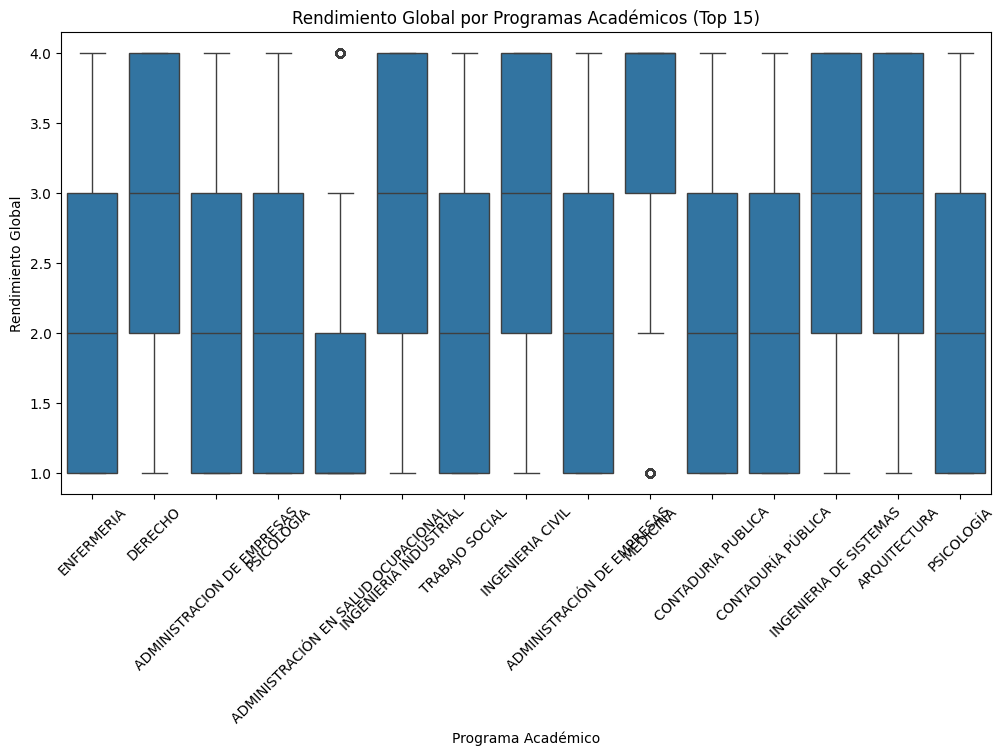

In [ ]:
# Seleccionar los 15 programas más populares
top_programs = data['ESTU_PRGM_ACADEMICO'].value_counts().head(15).index
filtered_data = data[data['ESTU_PRGM_ACADEMICO'].isin(top_programs)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='ESTU_PRGM_ACADEMICO', y='RENDIMIENTO_GLOBAL', data=filtered_data)
plt.title('Rendimiento Global por Programas Académicos (Top 15)')
plt.xlabel('Programa Académico')
plt.ylabel('Rendimiento Global')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calcular la distribución de 'RENDIMIENTO_GLOBAL' para cada carrera
frecuencias = data.groupby('ESTU_PRGM_ACADEMICO')['RENDIMIENTO_GLOBAL'].value_counts(normalize=True).unstack()
print(frecuencias)


RENDIMIENTO_GLOBAL                                     1         2         3  \
ESTU_PRGM_ACADEMICO                                                            
3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES  0.304348  0.304348  0.231884   
ACTIVIDAD FISICA Y DEPORTE                      0.419753  0.296296  0.203704   
ACUICULTURA                                     0.569620  0.341772  0.088608   
ADMINISTRACION                                  0.256410  0.239316  0.299145   
ADMINISTRACION  FINANCIERA                      0.337838  0.310811  0.175676   
...                                                  ...       ...       ...   
TRABAJO SOCIAL                                  0.412344  0.276289  0.200221   
TRADUCCION INGLES-FRANCES-ESPAÑOL               0.044118       NaN  0.073529   
TURISMO                                         0.139640  0.238739  0.396396   
URBANISMO                                            NaN  0.285714  0.285714   
ZOOTECNIA                               

In [ ]:
# Verificar valores faltantes en cada columna
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
dtype: int64


Veremos que porcentaje de datos nulos tenemos en cada columna con respecto al total

In [ ]:
# Calcular el porcentaje de valores faltantes
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)


ESTU_PRGM_ACADEMICO               0.000000
ESTU_PRGM_DEPARTAMENTO            0.000000
ESTU_VALORMATRICULAUNIVERSIDAD    0.907870
ESTU_HORASSEMANATRABAJA           4.455884
FAMI_ESTRATOVIVIENDA              4.640722
FAMI_TIENEINTERNET                3.845343
FAMI_EDUCACIONPADRE               3.347004
FAMI_EDUCACIONMADRE               3.417184
ESTU_PAGOMATRICULAPROPIO          0.938339
RENDIMIENTO_GLOBAL                0.000000
dtype: float64


In [ ]:
# Eliminar filas con valores faltantes en el DataFrame
data_cleaned = data.dropna()

# Verificar el nuevo tamaño del DataFrame después de eliminar filas
data_cleaned_shape = data_cleaned.shape
print(data_cleaned_shape)


(645661, 10)


In [ ]:
data_cleaned

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,3
1,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,4
4,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,2
...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,3
692496,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,1
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,2
692498,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,1


In [ ]:
# Verificar valores faltantes en el DataFrame
missing_values = data_cleaned.isnull().sum()
print(missing_values[missing_values > 0])  # Muestra solo las columnas con valores faltantes


Series([], dtype: int64)


In [ ]:
# Mostrar información del DataFrame
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 645661 entries, 0 to 692499
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ESTU_PRGM_ACADEMICO             645661 non-null  object
 1   ESTU_PRGM_DEPARTAMENTO          645661 non-null  object
 2   ESTU_VALORMATRICULAUNIVERSIDAD  645661 non-null  object
 3   ESTU_HORASSEMANATRABAJA         645661 non-null  object
 4   FAMI_ESTRATOVIVIENDA            645661 non-null  object
 5   FAMI_TIENEINTERNET              645661 non-null  object
 6   FAMI_EDUCACIONPADRE             645661 non-null  object
 7   FAMI_EDUCACIONMADRE             645661 non-null  object
 8   ESTU_PAGOMATRICULAPROPIO        645661 non-null  object
 9   RENDIMIENTO_GLOBAL              645661 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 54.2+ MB


# **PREPARACION DE LAS VARIABLES CATEGORICAS ( ONE-HOT ) **

In [ ]:
# Realizar One-Hot Encoding en la variable 'ESTU_PRGM_ACADEMICO'
est_prgm_academico_encoded = pd.get_dummies(data_cleaned['ESTU_PRGM_ACADEMICO'], prefix='ESTU_PRGM')

# Concatenar las columnas codificadas con el DataFrame original, asegurándote de eliminar la columna original
data_encoded = pd.concat([data_cleaned.drop('ESTU_PRGM_ACADEMICO', axis=1), est_prgm_academico_encoded], axis=1)

# Verificar las primeras filas del nuevo DataFrame
data_encoded.head()


,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,...,ESTU_PRGM_TEOLOGÍA,ESTU_PRGM_TERAPIA CARDIORRESPIRATORIA,ESTU_PRGM_TERAPIA OCUPACIONAL,ESTU_PRGM_TERAPIA RESPIRATORIA,ESTU_PRGM_TERAPIAS PSICOSOCIALES,ESTU_PRGM_TRABAJO SOCIAL,ESTU_PRGM_TRADUCCION INGLES-FRANCES-ESPAÑOL,ESTU_PRGM_TURISMO,ESTU_PRGM_URBANISMO,ESTU_PRGM_ZOOTECNIA
0,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,3,False,...,False,False,False,False,False,False,False,False,False,False
1,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1,False,...,False,False,False,False,False,False,False,False,False,False
2,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1,False,...,False,False,False,False,False,False,False,False,False,False
3,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,4,False,...,False,False,False,False,False,False,False,False,False,False
4,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,2,False,...,False,False,False,False,False,False,False,False,False,False


## **estudiante departamento**

In [ ]:
# 1. Frecuencia de estudiantes por departamento
frecuencia_departamento = data['ESTU_PRGM_DEPARTAMENTO'].value_counts(normalize=True)
print(frecuencia_departamento)

# 2. Rendimiento global promedio por departamento
rendimiento_departamento = data.groupby('ESTU_PRGM_DEPARTAMENTO')['RENDIMIENTO_GLOBAL'].mean().sort_values(ascending=False)
print(rendimiento_departamento)


ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             0.407450
ANTIOQUIA          0.120732
VALLE              0.064387
ATLANTICO          0.059235
SANTANDER          0.041629
NORTE SANTANDER    0.032618
BOLIVAR            0.029789
BOYACA             0.020286
CUNDINAMARCA       0.020243
NARIÑO             0.019428
RISARALDA          0.018309
CORDOBA            0.017600
TOLIMA             0.017214
CALDAS             0.016809
CAUCA              0.016565
HUILA              0.014433
MAGDALENA          0.013736
SUCRE              0.012526
CESAR              0.011955
QUINDIO            0.011883
META               0.011422
LA GUAJIRA         0.006900
CHOCO              0.006194
CAQUETA            0.003840
CASANARE           0.002674
PUTUMAYO           0.001148
ARAUCA             0.000851
AMAZONAS           0.000058
GUAVIARE           0.000053
VAUPES             0.000020
SAN ANDRES         0.000014
Name: proportion, dtype: float64
ESTU_PRGM_DEPARTAMENTO
CUNDINAMARCA       2.930732
CALDAS             2.7645

### Análisis de Resultados

1. **Frecuencia de Estudiantes por Departamento**:
   - **BOGOTÁ** tiene la mayor proporción de estudiantes (40.75%), lo que indica que es el departamento más representado en los datos.
   - Otros departamentos como **ANTIOQUIA** y **VALLE** tienen representaciones menores, pero aún significativas (12.07% y 6.44%, respectivamente).
   - Hay departamentos con proporciones muy bajas, como **AMAZONAS** y **GUAVIARE**, lo que sugiere que podrían no aportar mucha información al modelo.

2. **Rendimiento Global Promedio por Departamento**:
   - **CUNDINAMARCA** tiene el rendimiento global promedio más alto (2.93), lo que podría indicar que los estudiantes de este departamento tienen un mejor rendimiento en comparación con otros.
   - **BOGOTÁ** tiene un rendimiento promedio de 2.56, lo que es notable dado que también es el departamento con más estudiantes.
   - Otros departamentos como **LA GUAJIRA** y **GUAVIARE** tienen los promedios más bajos, lo que podría indicar que los estudiantes de estos lugares tienen un rendimiento global inferior.


In [ ]:
# Crear un DataFrame con la frecuencia y el rendimiento promedio
departamento_stats = pd.DataFrame({
    'frecuencia': frecuencia_departamento,
    'rendimiento_promedio': rendimiento_departamento
})

# Unir los dos DataFrames en uno solo
departamento_stats = departamento_stats.reset_index()
departamento_stats.columns = ['ESTU_PRGM_DEPARTAMENTO', 'frecuencia', 'rendimiento_promedio']

# Mostrar el DataFrame combinado
print(departamento_stats)


   ESTU_PRGM_DEPARTAMENTO  frecuencia  rendimiento_promedio
0                AMAZONAS    0.000058              1.775000
1               ANTIOQUIA    0.120732              2.667600
2                  ARAUCA    0.000851              1.787776
3               ATLANTICO    0.059235              2.454778
4                  BOGOTÁ    0.407450              2.557381
5                 BOLIVAR    0.029789              2.281788
6                  BOYACA    0.020286              2.686361
7                  CALDAS    0.016809              2.764519
8                 CAQUETA    0.003840              2.058293
9                CASANARE    0.002674              2.147948
10                  CAUCA    0.016565              2.278093
11                  CESAR    0.011955              2.118009
12                  CHOCO    0.006194              1.364421
13                CORDOBA    0.017600              2.110519
14           CUNDINAMARCA    0.020243              2.930732
15               GUAVIARE    0.000053   

In [ ]:
# Realizar One-Hot Encoding en las columnas 'ESTU_PRGM_ACADEMICO' y 'ESTU_PRGM_DEPARTAMENTO'
data_encoded = pd.get_dummies(data, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'], drop_first=True)

# Verificar el nuevo DataFrame
data_encoded
print(data_encoded.columns)


Index(['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL',
       'ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE',
       'ESTU_PRGM_ACADEMICO_ACUICULTURA',
       ...
       'ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER',
       'ESTU_PRGM_DEPARTAMENTO_PUTUMAYO', 'ESTU_PRGM_DEPARTAMENTO_QUINDIO',
       'ESTU_PRGM_DEPARTAMENTO_RISARALDA', 'ESTU_PRGM_DEPARTAMENTO_SAN ANDRES',
       'ESTU_PRGM_DEPARTAMENTO_SANTANDER', 'ESTU_PRGM_DEPARTAMENTO_SUCRE',
       'ESTU_PRGM_DEPARTAMENTO_TOLIMA', 'ESTU_PRGM_DEPARTAMENTO_VALLE',
       'ESTU_PRGM_DEPARTAMENTO_VAUPES'],
      dtype='object', length=985)


In [ ]:
data_encoded


,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,3,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,4,False,False,...,False,False,False,False,False,True,False,False,False,False
4,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,2,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,3,False,False,...,False,False,False,False,False,False,False,False,False,False
692496,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,1,False,False,...,True,False,False,False,False,False,False,False,False,False
692497,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,2,False,False,...,False,False,False,False,False,False,False,False,False,False
692498,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,1,False,False,...,False,False,False,False,False,False,False,True,False,False


# **ESTU_VALORMATRICULAUNIVERSIDAD	**
Convertir las categorías a valores numéricos (excepto "No pagó matrícula").
Calcular el promedio de las categorías.
Reemplazar "No pagó matrícula" con ese promedio.

In [ ]:
import pandas as pd
import numpy as np

# Reemplazar las categorías con sus valores correspondientes, incluyendo 'No pagó matrícula' como 3.5
data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'] = data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'].replace({
    'Menos de 500 mil': 0.5,
    'Entre 500 mil y menos de 1 millón': 0.75,
    'Entre 1 millón y menos de 2.5 millones': 1.5,
    'Entre 2.5 millones y menos de 4 millones': 3.0,
    'Entre 4 millones y menos de 5.5 millones': 4.5,
    'Entre 5.5 millones y menos de 7 millones': 6.0,
    'Más de 7 millones': 7.5,
    'No pagó matrícula': 3.5  # Reemplazar por 3.5
}).astype(float)

# Verificar que no haya más valores nulos (en este caso, no debería haber)
missing_values = data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull().sum()
print(f"Valores nulos en 'ESTU_VALORMATRICULAUNIVERSIDAD': {missing_values}")

# Calcular estadísticas descriptivas
estadisticas_valor_matricula = data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'].describe()

# Mostrar estadísticas
print("Estadísticas descriptivas de ESTU_VALORMATRICULAUNIVERSIDAD:\n", estadisticas_valor_matricula)


Valores nulos en 'ESTU_VALORMATRICULAUNIVERSIDAD': 6287
Estadísticas descriptivas de ESTU_VALORMATRICULAUNIVERSIDAD:
 count    686213.000000
mean          2.784451
std           2.163775
min           0.500000
25%           1.500000
50%           1.500000
75%           4.500000
max           7.500000
Name: ESTU_VALORMATRICULAUNIVERSIDAD, dtype: float64


In [ ]:
# Codificar 'FAMI_ESTRATOVIVIENDA'
estrato_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

data_encoded['FAMI_ESTRATOVIVIENDA_COD'] = data_encoded['FAMI_ESTRATOVIVIENDA'].map(estrato_mapping)

# Calcular la correlación entre 'ESTU_VALORMATRICULAUNIVERSIDAD' y 'FAMI_ESTRATOVIVIENDA_COD'
correlation = data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'].corr(data_encoded['FAMI_ESTRATOVIVIENDA_COD'])

# Mostrar el resultado
print(f'Correlación entre ESTU_VALORMATRICULAUNIVERSIDAD y FAMI_ESTRATOVIVIENDA: {correlation}')


Correlación entre ESTU_VALORMATRICULAUNIVERSIDAD y FAMI_ESTRATOVIVIENDA: 0.40922071093904777


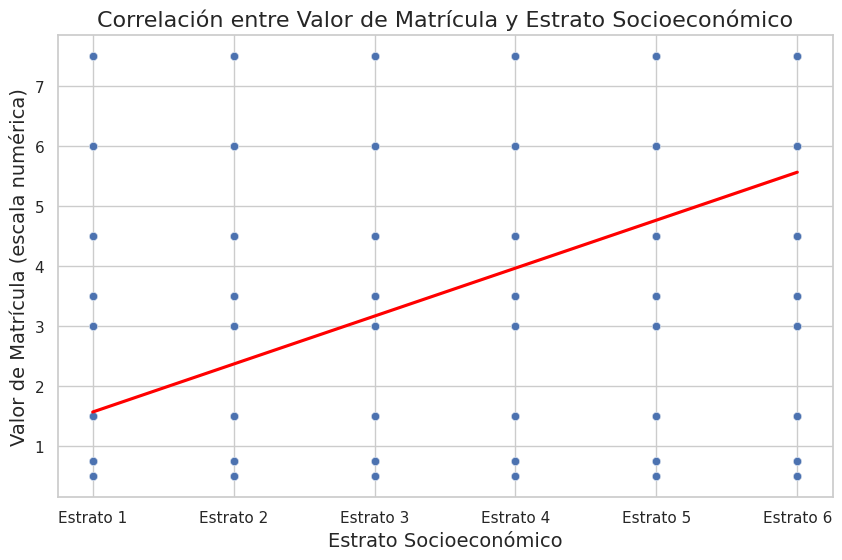

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style='whitegrid')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FAMI_ESTRATOVIVIENDA_COD',
                 y='ESTU_VALORMATRICULAUNIVERSIDAD',
                 data=data_encoded,
                 alpha=0.6)

# Añadir una línea de regresión
sns.regplot(x='FAMI_ESTRATOVIVIENDA_COD',
            y='ESTU_VALORMATRICULAUNIVERSIDAD',
            data=data_encoded,
            scatter=False,
            color='red')

# Configurar títulos y etiquetas
plt.title('Correlación entre Valor de Matrícula y Estrato Socioeconómico', fontsize=16)
plt.xlabel('Estrato Socioeconómico', fontsize=14)
plt.ylabel('Valor de Matrícula (escala numérica)', fontsize=14)
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6'])

# Mostrar el gráfico
plt.show()


In [ ]:
data_encoded

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,...,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES,FAMI_ESTRATOVIVIENDA_COD
0,6.00,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,3,False,False,...,False,False,False,False,False,False,False,False,False,3.0
1,3.00,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1,False,False,...,False,False,False,False,False,False,False,False,False,3.0
2,3.00,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1,False,False,...,False,False,False,False,False,False,False,False,False,3.0
3,4.50,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,4,False,False,...,False,False,False,False,True,False,False,False,False,4.0
4,3.00,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,2,False,False,...,False,False,False,False,False,False,False,False,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.75,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,3,False,False,...,False,False,False,False,False,False,False,False,False,2.0
692496,3.00,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,1,False,False,...,False,False,False,False,False,False,False,False,False,3.0
692497,1.50,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,2,False,False,...,False,False,False,False,False,False,False,False,False,3.0
692498,3.00,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,1,False,False,...,False,False,False,False,False,False,True,False,False,1.0


In [ ]:
# Eliminar la columna original FAMI_ESTRATOVIVIENDA
data_encoded = data_encoded.drop(columns=['FAMI_ESTRATOVIVIENDA'])


In [ ]:
data_encoded

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,...,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES,FAMI_ESTRATOVIVIENDA_COD
0,6.00,Menos de 10 horas,Si,Técnica o tecnológica incompleta,Postgrado,No,3,False,False,False,...,False,False,False,False,False,False,False,False,False,3.0
1,3.00,0,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1,False,False,False,...,False,False,False,False,False,False,False,False,False,3.0
2,3.00,Más de 30 horas,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1,False,False,False,...,False,False,False,False,False,False,False,False,False,3.0
3,4.50,0,Si,No sabe,Secundaria (Bachillerato) completa,No,4,False,False,False,...,False,False,False,False,True,False,False,False,False,4.0
4,3.00,Entre 21 y 30 horas,Si,Primaria completa,Primaria completa,No,2,False,False,False,...,False,False,False,False,False,False,False,False,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.75,Entre 11 y 20 horas,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,3,False,False,False,...,False,False,False,False,False,False,False,False,False,2.0
692496,3.00,Más de 30 horas,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,1,False,False,False,...,False,False,False,False,False,False,False,False,False,3.0
692497,1.50,Menos de 10 horas,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,2,False,False,False,...,False,False,False,False,False,False,False,False,False,3.0
692498,3.00,Menos de 10 horas,No,Primaria completa,Primaria completa,Si,1,False,False,False,...,False,False,False,False,False,False,True,False,False,1.0


In [ ]:
# Verificar los valores únicos de la columna ESTU_VALORMATRICULAUNIVERSIDAD
valores_unicos_matricula = data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()
print("Valores únicos de ESTU_VALORMATRICULAUNIVERSIDAD:", valores_unicos_matricula)


Valores únicos de ESTU_VALORMATRICULAUNIVERSIDAD: [6.   3.   4.5  7.5  1.5  0.75 0.5  3.5   nan]


In [ ]:
# Llenar valores nulos en ESTU_VALORMATRICULAUNIVERSIDAD con 3.5
data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(3.5, inplace=True)

# Verificar que no haya más valores nulos
missing_values = data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull().sum()
print(f"Valores nulos en 'ESTU_VALORMATRICULAUNIVERSIDAD': {missing_values}")


Valores nulos en 'ESTU_VALORMATRICULAUNIVERSIDAD': 0


In [ ]:
# Verificar los valores únicos de la columna ESTU_VALORMATRICULAUNIVERSIDAD
valores_unicos_matricula = data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()
print("Valores únicos de ESTU_VALORMATRICULAUNIVERSIDAD:", valores_unicos_matricula)


Valores únicos de ESTU_VALORMATRICULAUNIVERSIDAD: [6.   3.   4.5  7.5  1.5  0.75 0.5  3.5 ]


<ipython-input-77-ed128551da39>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_frecuencias, x='Valor Matrícula', y='Porcentaje', palette='Set2')


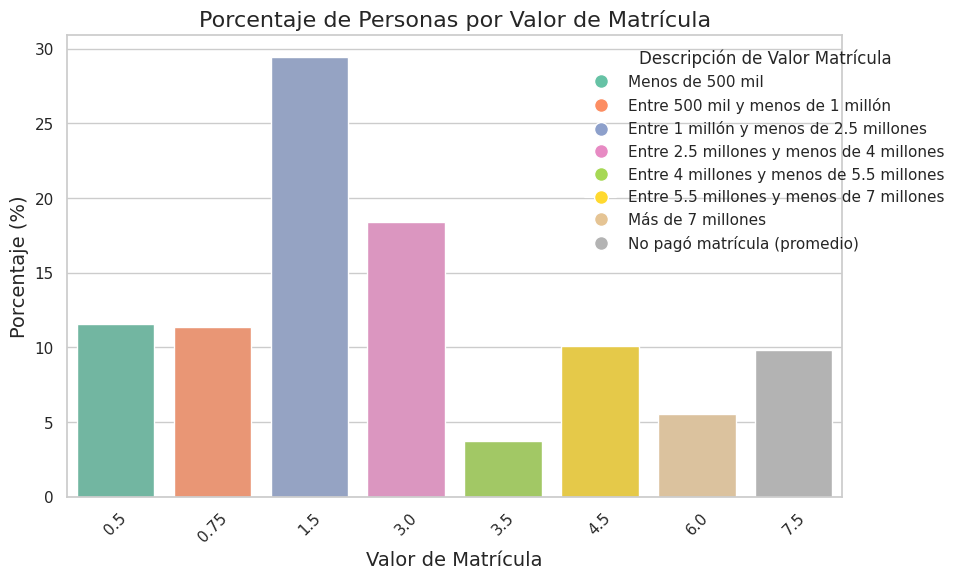

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las frecuencias de cada valor de matrícula
frecuencias_matricula = data_encoded['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts(normalize=True) * 100

# Crear un DataFrame para facilitar la visualización y ordenarlo
df_frecuencias = pd.DataFrame({
    'Valor Matrícula': frecuencias_matricula.index,
    'Porcentaje': frecuencias_matricula.values
}).sort_values(by='Porcentaje', ascending=False)  # Ordenar por porcentaje de mayor a menor

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_frecuencias, x='Valor Matrícula', y='Porcentaje', palette='Set2')

# Configuración del gráfico
plt.title('Porcentaje de Personas por Valor de Matrícula', fontsize=16)
plt.xlabel('Valor de Matrícula', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.xticks(rotation=45)

# Leyenda para los valores de matrícula
leyenda_texto = {
    0.5: 'Menos de 500 mil',
    0.75: 'Entre 500 mil y menos de 1 millón',
    1.5: 'Entre 1 millón y menos de 2.5 millones',
    3.0: 'Entre 2.5 millones y menos de 4 millones',
    4.5: 'Entre 4 millones y menos de 5.5 millones',
    6.0: 'Entre 5.5 millones y menos de 7 millones',
    7.5: 'Más de 7 millones',
    3.5: 'No pagó matrícula (promedio)'  # Si decidiste usar 3.5 para los que no pagaron
}

# Crear la leyenda a la derecha
handles = [plt.Line2D([0], [0], marker='o', color='w', label=leyenda_texto[val],
                       markersize=10, markerfacecolor=sns.color_palette('Set2')[i]) for i, val in enumerate(leyenda_texto.keys())]

plt.legend(handles=handles, title='Descripción de Valor Matrícula', loc='upper right', bbox_to_anchor=(1.15, 1), frameon=False)

plt.show()


# **ESTU_HORASSEMANATRABAJA**

In [ ]:
# Frecuencias de ESTU_HORASSEMANATRABAJA
frecuencias_horas_trabajo = data_encoded['ESTU_HORASSEMANATRABAJA'].value_counts()
print(frecuencias_horas_trabajo)


ESTU_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64


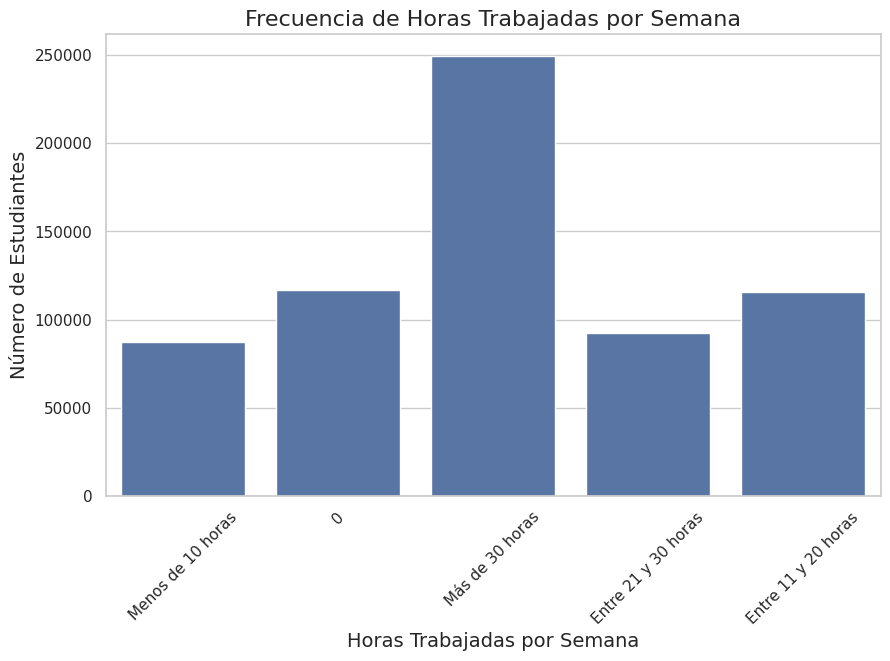

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style='whitegrid')

# Crear un gráfico de barras de la frecuencia de horas trabajadas
plt.figure(figsize=(10, 6))
sns.countplot(data=data_encoded, x='ESTU_HORASSEMANATRABAJA')
plt.title('Frecuencia de Horas Trabajadas por Semana', fontsize=16)
plt.xlabel('Horas Trabajadas por Semana', fontsize=14)
plt.ylabel('Número de Estudiantes', fontsize=14)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [ ]:
# Codificar la variable ESTU_HORASSEMANATRABAJA
horas_trabajo_codificado = {
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35,
    '0': 0  # Para quienes no trabajan
}

data_encoded['ESTU_HORASSEMANATRABAJA_COD'] = data_encoded['ESTU_HORASSEMANATRABAJA'].map(horas_trabajo_codificado)

# Calcular estadísticas descriptivas
estadisticas_horas_trabajo = data_encoded['ESTU_HORASSEMANATRABAJA_COD'].describe()
print(estadisticas_horas_trabajo)


count    661643.000000
mean         19.978228
std          13.884756
min           0.000000
25%           5.000000
50%          25.000000
75%          35.000000
max          35.000000
Name: ESTU_HORASSEMANATRABAJA_COD, dtype: float64


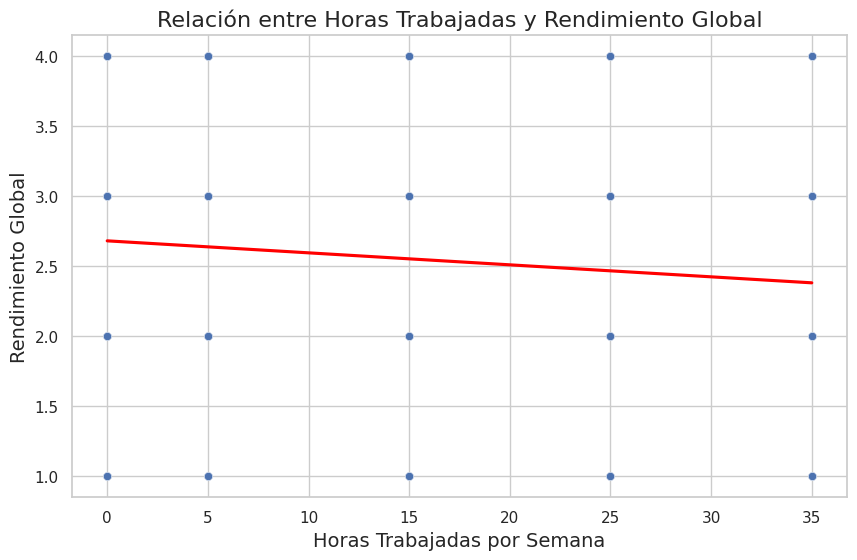

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style='whitegrid')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ESTU_HORASSEMANATRABAJA_COD',
                 y='RENDIMIENTO_GLOBAL',
                 data=data_encoded,
                 alpha=0.6)

# Añadir una línea de regresión
sns.regplot(x='ESTU_HORASSEMANATRABAJA_COD',
            y='RENDIMIENTO_GLOBAL',
            data=data_encoded,
            scatter=False,
            color='red')

# Configurar títulos y etiquetas
plt.title('Relación entre Horas Trabajadas y Rendimiento Global', fontsize=16)
plt.xlabel('Horas Trabajadas por Semana', fontsize=14)
plt.ylabel('Rendimiento Global', fontsize=14)

# Mostrar el gráfico
plt.show()


La línea de regresión casi recta sugiere que hay una relación negativa entre las horas trabajadas por semana (ESTU_HORASSEMANATRABAJA_COD) y el rendimiento global (RENDIMIENTO_GLOBAL). Específicamente, parece que a medida que aumentan las horas trabajadas, el rendimiento global tiende a disminuir.

In [ ]:
data_encoded

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,...,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES,FAMI_ESTRATOVIVIENDA_COD,ESTU_HORASSEMANATRABAJA_COD
0,6.00,Menos de 10 horas,Si,Técnica o tecnológica incompleta,Postgrado,No,3,False,False,False,...,False,False,False,False,False,False,False,False,3.0,5.0
1,3.00,0,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1,False,False,False,...,False,False,False,False,False,False,False,False,3.0,0.0
2,3.00,Más de 30 horas,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1,False,False,False,...,False,False,False,False,False,False,False,False,3.0,35.0
3,4.50,0,Si,No sabe,Secundaria (Bachillerato) completa,No,4,False,False,False,...,False,False,False,True,False,False,False,False,4.0,0.0
4,3.00,Entre 21 y 30 horas,Si,Primaria completa,Primaria completa,No,2,False,False,False,...,False,False,False,False,False,False,False,False,3.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.75,Entre 11 y 20 horas,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,3,False,False,False,...,False,False,False,False,False,False,False,False,2.0,15.0
692496,3.00,Más de 30 horas,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,1,False,False,False,...,False,False,False,False,False,False,False,False,3.0,35.0
692497,1.50,Menos de 10 horas,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,2,False,False,False,...,False,False,False,False,False,False,False,False,3.0,5.0
692498,3.00,Menos de 10 horas,No,Primaria completa,Primaria completa,Si,1,False,False,False,...,False,False,False,False,False,True,False,False,1.0,5.0


In [ ]:
# Re-definir la codificación
horas_trabajo_codificado = {
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35,
    '0': 0  # Para quienes no trabajan
}

# Aplicar la codificación
data_encoded['ESTU_HORASSEMANATRABAJA_COD'] = data_encoded['ESTU_HORASSEMANATRABAJA'].map(horas_trabajo_codificado)

# Eliminar la columna original
data_encoded.drop('ESTU_HORASSEMANATRABAJA', axis=1, inplace=True)

# Verificar el nuevo DataFrame
data_encoded.head()


,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,...,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES,FAMI_ESTRATOVIVIENDA_COD,ESTU_HORASSEMANATRABAJA_COD
0,6.0,Si,Técnica o tecnológica incompleta,Postgrado,No,3,False,False,False,False,...,False,False,False,False,False,False,False,False,3.0,5.0
1,3.0,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1,False,False,False,False,...,False,False,False,False,False,False,False,False,3.0,0.0
2,3.0,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1,False,False,False,False,...,False,False,False,False,False,False,False,False,3.0,35.0
3,4.5,Si,No sabe,Secundaria (Bachillerato) completa,No,4,False,False,False,False,...,False,False,False,True,False,False,False,False,4.0,0.0
4,3.0,Si,Primaria completa,Primaria completa,No,2,False,False,False,False,...,False,False,False,False,False,False,False,False,3.0,25.0


In [ ]:
# Calcular frecuencias
frecuencias_internet = data_encoded['FAMI_TIENEINTERNET'].value_counts()
print("Frecuencias de FAMI_TIENEINTERNET:")
print(frecuencias_internet)



Frecuencias de FAMI_TIENEINTERNET:
FAMI_TIENEINTERNET
Si    592514
No     73357
Name: count, dtype: int64


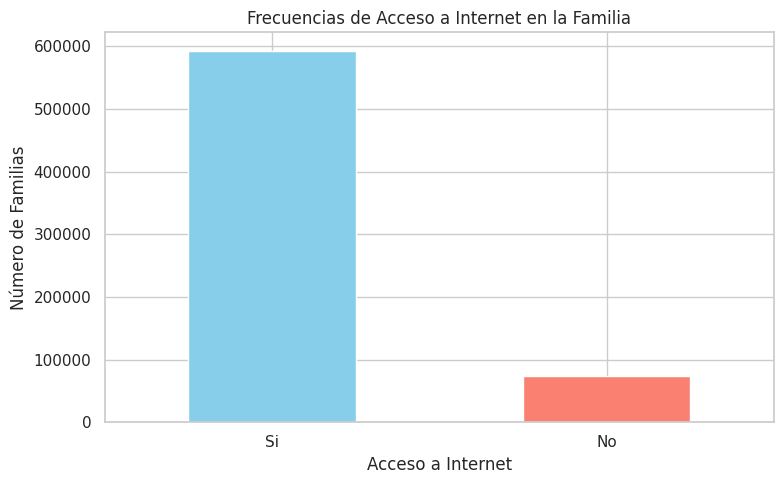

In [ ]:
import matplotlib.pyplot as plt

# Frecuencias de FAMI_TIENEINTERNET
frecuencias_internet = data_encoded['FAMI_TIENEINTERNET'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
frecuencias_internet.plot(kind='bar', color=['skyblue', 'salmon'])

# Añadir título y etiquetas
plt.title('Frecuencias de Acceso a Internet en la Familia')
plt.xlabel('Acceso a Internet')
plt.ylabel('Número de Familias')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Las frecuencias de la variable FAMI_TIENEINTERNET muestran que una gran mayoría de los estudiantes tiene acceso a Internet en casa:

Sí: 592,514 estudiantes
No: 73,357 estudiantes
Esto sugiere que la mayoría de los estudiantes cuentan con acceso a Internet, lo que puede influir en su rendimiento académico y acceso a recursos educativos.

In [ ]:
# Codificación de la variable FAMI_TIENEINTERNET
data_encoded['FAMI_TIENEINTERNET_COD'] = data_encoded['FAMI_TIENEINTERNET'].map({'Si': 1, 'No': 0})

# Eliminar la columna original
data_encoded.drop(columns=['FAMI_TIENEINTERNET'], inplace=True)


In [ ]:
data_encoded

,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,...,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES,FAMI_ESTRATOVIVIENDA_COD,ESTU_HORASSEMANATRABAJA_COD,FAMI_TIENEINTERNET_COD
0,6.00,Técnica o tecnológica incompleta,Postgrado,No,3,False,False,False,False,False,...,False,False,False,False,False,False,False,3.0,5.0,1.0
1,3.00,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,1,False,False,False,False,False,...,False,False,False,False,False,False,False,3.0,0.0,0.0
2,3.00,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,1,False,False,False,False,False,...,False,False,False,False,False,False,False,3.0,35.0,1.0
3,4.50,No sabe,Secundaria (Bachillerato) completa,No,4,False,False,False,False,False,...,False,False,True,False,False,False,False,4.0,0.0,1.0
4,3.00,Primaria completa,Primaria completa,No,2,False,False,False,False,False,...,False,False,False,False,False,False,False,3.0,25.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.75,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,3,False,False,False,False,False,...,False,False,False,False,False,False,False,2.0,15.0,1.0
692496,3.00,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,1,False,False,False,False,False,...,False,False,False,False,False,False,False,3.0,35.0,1.0
692497,1.50,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,2,False,False,False,False,False,...,False,False,False,False,False,False,False,3.0,5.0,1.0
692498,3.00,Primaria completa,Primaria completa,Si,1,False,False,False,False,False,...,False,False,False,False,True,False,False,1.0,5.0,0.0


In [ ]:
# Crear una copia del DataFrame data_encoded y llamarla data_encoded_copy
data_encoded_copy = data_encoded.copy()


In [ ]:
# Calcular frecuencias para FAMI_EDUCACIONPADRE
frecuencias_padre = data_encoded_copy['FAMI_EDUCACIONPADRE'].value_counts()
print("Frecuencias de FAMI_EDUCACIONPADRE:")
print(frecuencias_padre)

# Calcular frecuencias para FAMI_EDUCACIONMADRE
frecuencias_madre = data_encoded_copy['FAMI_EDUCACIONMADRE'].value_counts()
print("\nFrecuencias de FAMI_EDUCACIONMADRE:")
print(frecuencias_madre)


Frecuencias de FAMI_EDUCACIONPADRE:
FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64

Frecuencias de FAMI_EDUCACIONMADRE:
FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56125
Postgrado      

<ipython-input-109-02a6f5ef56aa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_encoded_copy, x='FAMI_EDUCACIONPADRE', palette='Set2', order=orden_padre)


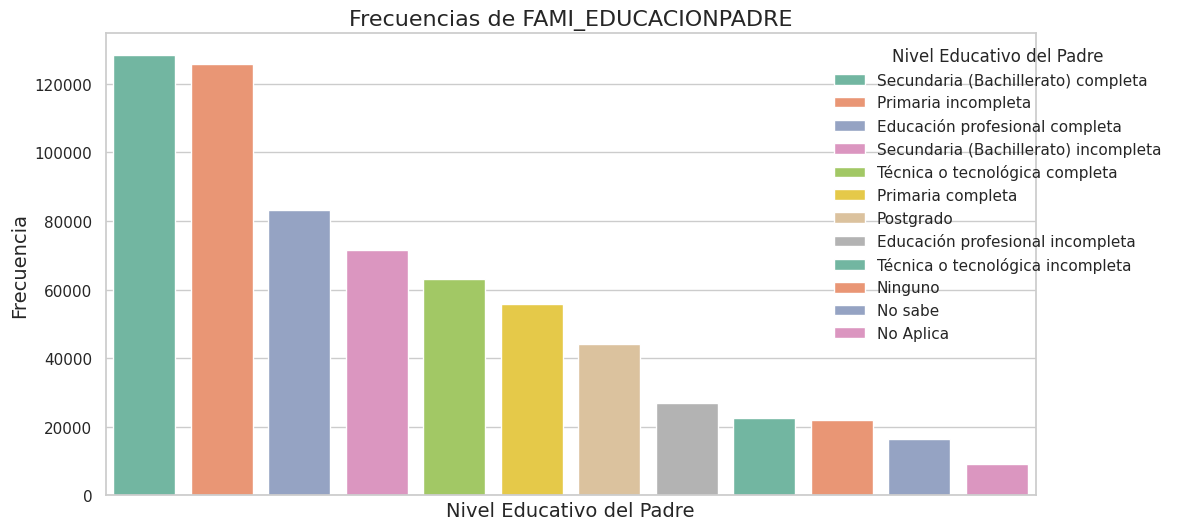

<ipython-input-109-02a6f5ef56aa>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_encoded_copy, x='FAMI_EDUCACIONMADRE', palette='Set1', order=orden_madre)


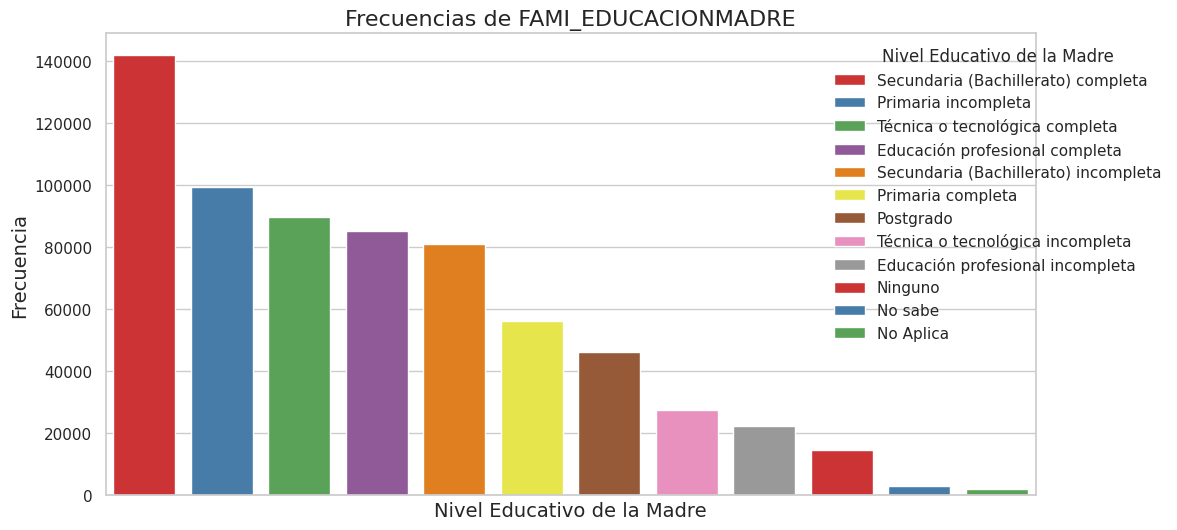

In [ ]:
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Calcular frecuencias de FAMI_EDUCACIONPADRE
frecuencias_padre = data_encoded_copy['FAMI_EDUCACIONPADRE'].value_counts()

# Obtener el orden basado en frecuencias
orden_padre = frecuencias_padre.index

# Gráfico de barras para FAMI_EDUCACIONPADRE
plt.figure(figsize=(12, 6))
sns.countplot(data=data_encoded_copy, x='FAMI_EDUCACIONPADRE', palette='Set2', order=orden_padre)
plt.title('Frecuencias de FAMI_EDUCACIONPADRE', fontsize=16)
plt.xlabel('Nivel Educativo del Padre', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks([])  # Eliminar las etiquetas del eje X

# Personalizar la leyenda para que esté en orden de frecuencia
plt.legend(title='Nivel Educativo del Padre', labels=orden_padre, loc='upper right', bbox_to_anchor=(1.15, 1), frameon=False)
plt.show()

# Calcular frecuencias de FAMI_EDUCACIONMADRE
frecuencias_madre = data_encoded_copy['FAMI_EDUCACIONMADRE'].value_counts()

# Obtener el orden basado en frecuencias
orden_madre = frecuencias_madre.index

# Gráfico de barras para FAMI_EDUCACIONMADRE
plt.figure(figsize=(12, 6))
sns.countplot(data=data_encoded_copy, x='FAMI_EDUCACIONMADRE', palette='Set1', order=orden_madre)
plt.title('Frecuencias de FAMI_EDUCACIONMADRE', fontsize=16)
plt.xlabel('Nivel Educativo de la Madre', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks([])  # Eliminar las etiquetas del eje X

# Personalizar la leyenda para que esté en orden de frecuencia
plt.legend(title='Nivel Educativo de la Madre', labels=orden_madre, loc='upper right', bbox_to_anchor=(1.15, 1), frameon=False)
plt.show()


In [ ]:
# Imprimir valores únicos de FAMI_EDUCACIONPADRE
valores_unicos_padre = data_encoded_copy['FAMI_EDUCACIONPADRE'].unique()
print("Valores únicos de FAMI_EDUCACIONPADRE:")
print(valores_unicos_padre)

# Imprimir valores únicos de FAMI_EDUCACIONMADRE
valores_unicos_madre = data_encoded_copy['FAMI_EDUCACIONMADRE'].unique()
print("\nValores únicos de FAMI_EDUCACIONMADRE:")
print(valores_unicos_madre)


Valores únicos de FAMI_EDUCACIONPADRE:
['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'No sabe' 'Primaria completa'
 'Educación profesional completa' 'Educación profesional incompleta'
 'Primaria incompleta' 'Postgrado' nan
 'Secundaria (Bachillerato) incompleta' 'Ninguno' 'No Aplica']

Valores únicos de FAMI_EDUCACIONMADRE:
['Postgrado' 'Técnica o tecnológica incompleta'
 'Secundaria (Bachillerato) completa' 'Primaria completa'
 'Técnica o tecnológica completa' 'Secundaria (Bachillerato) incompleta'
 'Educación profesional incompleta' 'Educación profesional completa'
 'Primaria incompleta' nan 'Ninguno' 'No Aplica' 'No sabe']


In [ ]:
# Calcular el porcentaje de valores nan en cada columna
porcentaje_nan_padre = data_encoded_copy['FAMI_EDUCACIONPADRE'].isna().mean() * 100
porcentaje_nan_madre = data_encoded_copy['FAMI_EDUCACIONMADRE'].isna().mean() * 100

print(f"Porcentaje de valores nan en FAMI_EDUCACIONPADRE: {porcentaje_nan_padre:.2f}%")
print(f"Porcentaje de valores nan en FAMI_EDUCACIONMADRE: {porcentaje_nan_madre:.2f}%")


Porcentaje de valores nan en FAMI_EDUCACIONPADRE: 3.35%
Porcentaje de valores nan en FAMI_EDUCACIONMADRE: 3.42%


In [ ]:
# Eliminar filas con nan en las columnas específicas
data_encoded_copy = data_encoded_copy.dropna(subset=['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'])


In [ ]:
# Realizar One-Hot Encoding en las columnas 'FAMI_EDUCACIONPADRE' y 'FAMI_EDUCACIONMADRE'
data_encoded_copy = pd.get_dummies(data_encoded_copy, columns=['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], drop_first=True)

# Verificar el nuevo DataFrame
print(data_encoded_copy.columns)


Index(['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL', 'ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE',
       'ESTU_PRGM_ACADEMICO_ACUICULTURA', 'ESTU_PRGM_ACADEMICO_ADMINISTRACION',
       'ESTU_PRGM_ACADEMICO_ADMINISTRACION  FINANCIERA',
       'ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO',
       'ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA',
       'ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA',
       ...
       'FAMI_EDUCACIONMADRE_Ninguno', 'FAMI_EDUCACIONMADRE_No Aplica',
       'FAMI_EDUCACIONMADRE_No sabe', 'FAMI_EDUCACIONMADRE_Postgrado',
       'FAMI_EDUCACIONMADRE_Primaria completa',
       'FAMI_EDUCACIONMADRE_Primaria incompleta',
       'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa',
       'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta',
       'FAMI_EDUCACIONMADRE_Técnica o tecnológica completa',
       'FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta'],
      dtype='object', length=1005)


In [ ]:
data_encoded_copy

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,...,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,6.00,No,3,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,3.00,No,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3.00,No,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,4.50,No,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,3.00,No,2,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.75,Si,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
692496,3.00,No,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
692497,1.50,Si,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
692498,3.00,Si,1,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Valores únicos de ESTU_PAGOMATRICULAPROPIO
valores_unicos_pago_matricula = data_encoded['ESTU_PAGOMATRICULAPROPIO'].unique()
print("Valores únicos de ESTU_PAGOMATRICULAPROPIO:", valores_unicos_pago_matricula)


Valores únicos de ESTU_PAGOMATRICULAPROPIO: ['No' 'Si' nan]


In [ ]:
# Contar los valores nulos en la columna
valores_nulos = data_encoded['ESTU_PAGOMATRICULAPROPIO'].isna().sum()

# Contar el total de registros
total_registros = len(data_encoded['ESTU_PAGOMATRICULAPROPIO'])

# Calcular el porcentaje de valores nulos
porcentaje_nulos = (valores_nulos / total_registros) * 100

print(f"Porcentaje de valores nulos en ESTU_PAGOMATRICULAPROPIO: {porcentaje_nulos:.2f}%")


Porcentaje de valores nulos en ESTU_PAGOMATRICULAPROPIO: 0.94%


In [ ]:
# Eliminar filas con valores nulos en la columna ESTU_PAGOMATRICULAPROPIO en la copia
data_encoded_copy = data_encoded_copy.dropna(subset=['ESTU_PAGOMATRICULAPROPIO'])

# Verificar la nueva forma de data_encoded_copy
print(data_encoded_copy.shape)


(662823, 1005)


In [ ]:
# Valores únicos de ESTU_PAGOMATRICULAPROPIO
valores_unicos_pago_matricula = data_encoded_copy['ESTU_PAGOMATRICULAPROPIO'].unique()
print("Valores únicos de ESTU_PAGOMATRICULAPROPIO:", valores_unicos_pago_matricula)

Valores únicos de ESTU_PAGOMATRICULAPROPIO: ['No' 'Si']


In [ ]:
# Asegurarse de trabajar con una copia explícita
data_encoded_copy = data_encoded_copy.copy()

# Codificación de la variable ESTU_PAGOMATRICULAPROPIO usando .loc
data_encoded_copy.loc[:, 'ESTU_PAGOMATRICULAPROPIO_COD'] = data_encoded_copy['ESTU_PAGOMATRICULAPROPIO'].map({'Si': 1, 'No': 0})

# Eliminar la columna original usando .loc
data_encoded_copy.drop(columns=['ESTU_PAGOMATRICULAPROPIO'], inplace=True)

# Verificar el resultado
print(data_encoded_copy[['ESTU_PAGOMATRICULAPROPIO_COD']].head())


   ESTU_PAGOMATRICULAPROPIO_COD
0                             0
1                             0
2                             0
3                             0
4                             0


In [ ]:
data_encoded_copy

,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,...,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,ESTU_PAGOMATRICULAPROPIO_COD
0,6.00,3,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0
1,3.00,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
2,3.00,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
3,4.50,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
4,3.00,2,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.75,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
692496,3.00,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
692497,1.50,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
692498,3.00,1,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


In [ ]:
# Comprobar valores nulos
print(data_encoded_copy.isnull().sum())

# Comprobar tipos de datos
print(data_encoded_copy.dtypes)


ESTU_VALORMATRICULAUNIVERSIDAD                              0
RENDIMIENTO_GLOBAL                                          0
ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE              0
ESTU_PRGM_ACADEMICO_ACUICULTURA                             0
ESTU_PRGM_ACADEMICO_ADMINISTRACION                          0
                                                           ..
FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa      0
FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta    0
FAMI_EDUCACIONMADRE_Técnica o tecnológica completa          0
FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta        0
ESTU_PAGOMATRICULAPROPIO_COD                                0
Length: 1005, dtype: int64
ESTU_VALORMATRICULAUNIVERSIDAD                              float64
RENDIMIENTO_GLOBAL                                            int64
ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE                 bool
ESTU_PRGM_ACADEMICO_ACUICULTURA                                bool
ESTU_PRGM_ACADEMICO

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador
scaler = MinMaxScaler()

# Normaliza 'ESTU_VALORMATRICULAUNIVERSIDAD'
data_encoded_copy['ESTU_VALORMATRICULAUNIVERSIDAD'] = scaler.fit_transform(data_encoded_copy[['ESTU_VALORMATRICULAUNIVERSIDAD']])


In [ ]:
data_encoded_copy

,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,...,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,ESTU_PAGOMATRICULAPROPIO_COD
0,0.785714,3,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0
1,0.357143,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
2,0.357143,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
3,0.571429,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
4,0.357143,2,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.035714,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
692496,0.357143,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
692497,0.142857,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
692498,0.357143,1,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


In [ ]:
from sklearn.model_selection import train_test_split

# Definir características y objetivo
X = data_encoded_copy.drop(columns=['RENDIMIENTO_GLOBAL'])  # Características
y = data_encoded_copy['RENDIMIENTO_GLOBAL']  # Objetivo

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


In [ ]:
# Hacer predicciones
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular y mostrar métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("R²:", r2)
